# **Urban Simulation Assessment**

# **Part 1: London’s underground resilience**

## **I. Topological network**

## Constructing the networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np

In [2]:
# Import the graphml file for London's underground

G = nx.read_graphml('london network graphml.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
# To check node attributes:
list(G.nodes(data = True))[0:5]

[('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'}),
 ('Kingsbury', {'coords': '(519359.9688603217, 188721.22027255083)'}),
 ('Queensbury', {'coords': '(518811.3613368616, 189760.50737704366)'}),
 ('Canons Park', {'coords': '(518183.29968291725, 191257.26260848)'}),
 ('Stanmore', {'coords': '(517580.4596464033, 192537.99948098673)'})]

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    

In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [8]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

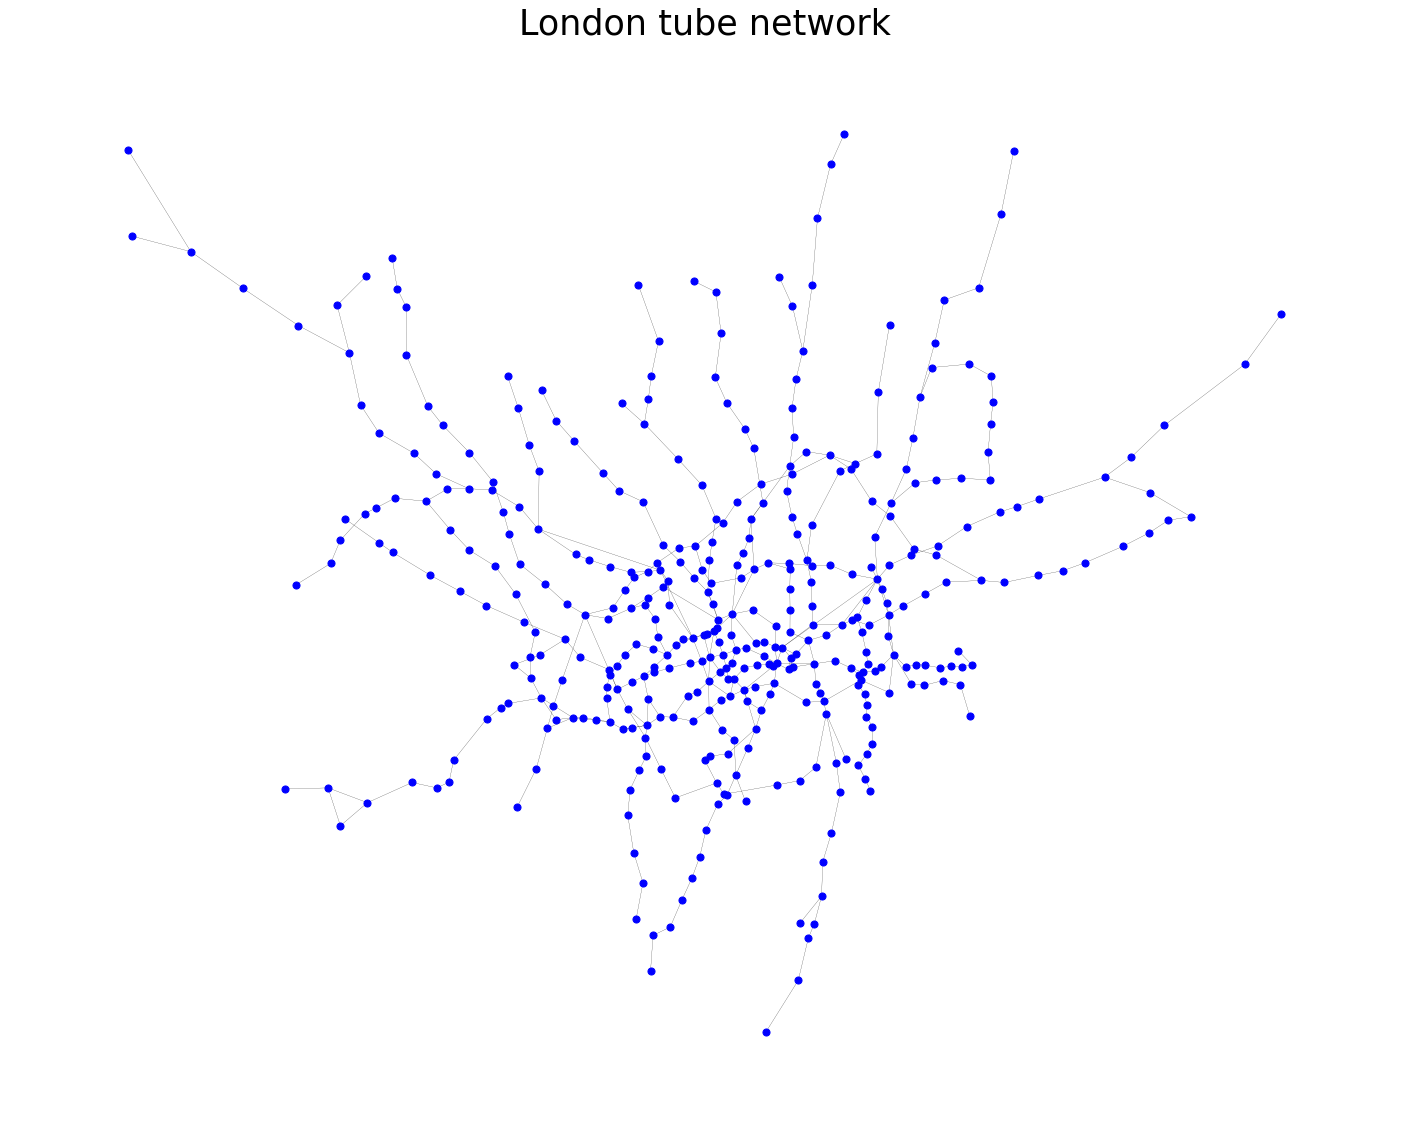

In [9]:
# Plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=35)
plt.axis("off")
plt.show()


In [10]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,line_name,flows
0,Wembley Park,Kingsbury,2916.771558,Jubilee,12356
1,Wembley Park,Neasden,2353.165938,Jubilee,6744
2,Wembley Park,Preston Road,1419.735166,Metropolitan,36601
3,Wembley Park,Finchley Road,7266.373927,Metropolitan,55216
4,Kingsbury,Queensbury,1245.995234,Jubilee,9419
5,Queensbury,Canons Park,1693.307343,Jubilee,6385
6,Canons Park,Stanmore,1419.669476,Jubilee,3624
7,Stratford,West Ham,1673.509515,Jubilee,91801
8,Stratford,Mile End,2805.001392,Central,12010
9,Stratford,Leyton,2131.342926,Central,56082


## Exploring the network

In [11]:
# The maximum distance between stations
max_dist=max({weight for e1, e2, weight in G.edges(data='flows')})
max_dist
#This distance in given in meters

219499

In [12]:
#if want to know the edge connecting the stations farther away from each other
max(dict(G.edges).items(), key=lambda x: x[1]['length'])

(('Wembley Park', 'Finchley Road'),
 {'length': 7266.37392749648, 'line_name': 'Metropolitan', 'flows': 55216})

In [13]:
# diameter of the network
nx.diameter(G)

36

In [14]:
# diameter of the network considering the distance between stations (weighted diameter)

nlen = {n:nx.single_source_dijkstra_path_length(G, n, weight='length') for n in G.nodes() }
e = nx.eccentricity(G,sp=nlen)
d = nx.diameter(G, e)
d

78581.28589029584

### **I.1 Centrality measures:**

#### Degree Centrality 

In [15]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')


# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


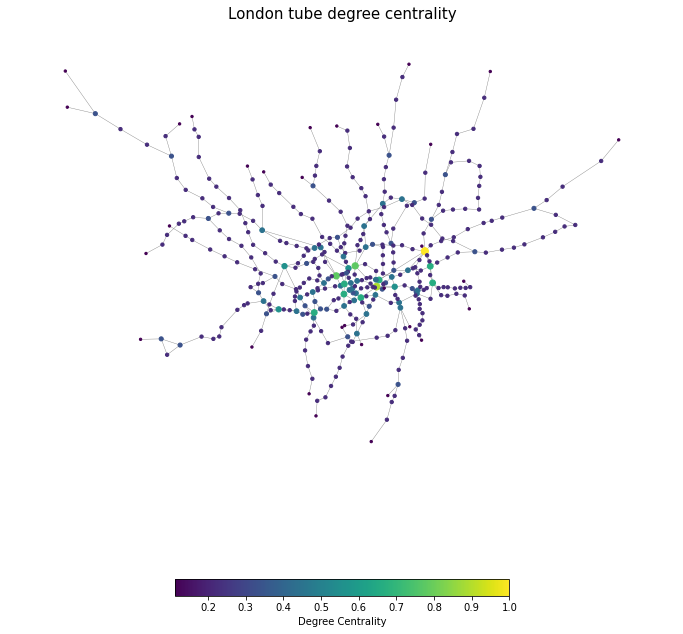

In [16]:
# Lets set colour and size of nodes according to degree values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]

# Plot graph

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G, pos = pos, node_color= deg_color, node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality

In [17]:
# Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


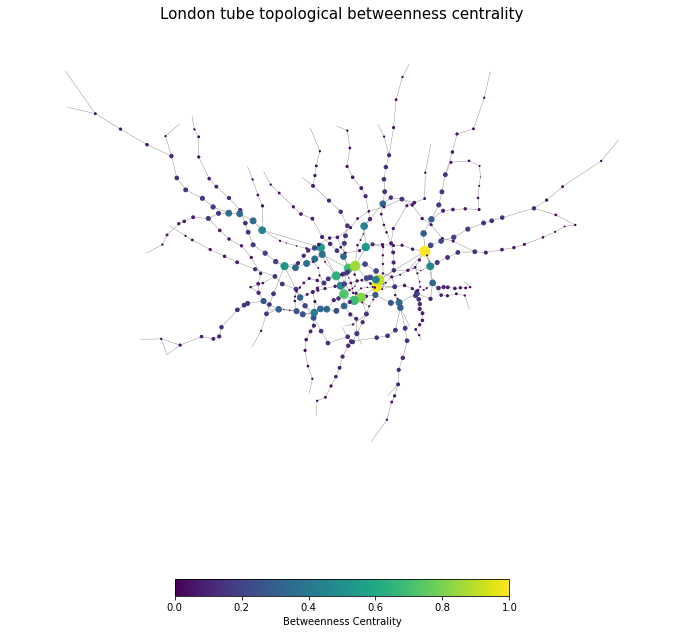

In [18]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality

In [19]:
# Topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


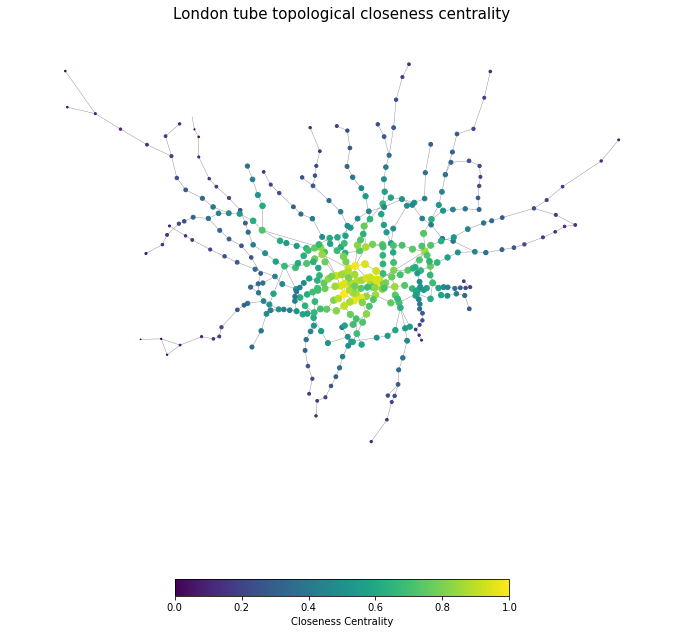

In [20]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [21]:
# number of connected components
nx.number_connected_components(G)

1

### **I.3 Node measures:**

#### Non-sequential removal

In [22]:
G2a=G.copy()
G2b=G.copy()
G2c=G.copy()

In [23]:
# Select top values
a=1 # Adjust the value from 1 to 10 to get the romoval values

values_sorted_a = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
sorted_a_2=[e for e,v in values_sorted_a[:a]]
print(sorted_a_2)

values_sorted_b = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_b_2=[e for e,v in values_sorted_b[:a]]
print(sorted_b_2)

values_sorted_c = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
sorted_c_2=[e for e,v in values_sorted_c[:a]]
print(sorted_c_2)

['Stratford']
['Stratford']
['Green Park']


In [24]:
#Remove nodes:
G2a.remove_nodes_from(sorted_a_2)
la2=list(G2a.nodes)
print(len(la2))

G2b.remove_nodes_from(sorted_b_2)
lb2=list(G2b.nodes)
print(len(lb2))

G2c.remove_nodes_from(sorted_c_2)
lc2=list(G2c.nodes)
print(len(lc2))

400
400
400


In [25]:
# number of connected components
print(nx.number_connected_components(G2a))

print(nx.number_connected_components(G2b))

print(nx.number_connected_components(G2c))

3
3
1


In [26]:
# To comput the size (number of node) of each component
G2aSub = [G2a.subgraph(c).copy() for c in nx.connected_components(G2a)]
print([len(subgraph.nodes) for subgraph in G2aSub])

G2bSub = [G2b.subgraph(c).copy() for c in nx.connected_components(G2b)]
print([len(subgraph.nodes) for subgraph in G2bSub])

G2cSub = [G2c.subgraph(c).copy() for c in nx.connected_components(G2c)]
print([len(subgraph.nodes) for subgraph in G2cSub])

[379, 20, 1]
[379, 20, 1]
[400]


In [27]:
# Calculating the average clustering coefficient

clus_a = nx.average_clustering(G2a)
print(f'avg clustering coefficient for deg: {clus_a}')

clus_b = nx.average_clustering(G2b)
print(f'avg clustering coefficient for bet: {clus_b}')

clus_c = nx.average_clustering(G2c)
print(f'avg clustering coefficient for clo: {clus_c}')

avg clustering coefficient for deg: 0.030625000000000003
avg clustering coefficient for bet: 0.030625000000000003
avg clustering coefficient for clo: 0.02979166666666667


#### Sequential removal

In [28]:
G3a=G.copy()
G3b=G.copy()
G3c=G.copy()

In [29]:
# Select top values
b=1

values_sorted_a = sorted(deg_london.items(), key=itemgetter(1), reverse=True)
sorted_a_3=[e for e,v in values_sorted_a[:b]]
print(sorted_a_3)

values_sorted_b = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_b_3=[e for e,v in values_sorted_b[:b]]
print(sorted_b_3)

values_sorted_c = sorted(clos_t.items(), key=itemgetter(1), reverse=True)
sorted_c_3=[e for e,v in values_sorted_c[:b]]
print(sorted_c_3)

['Stratford']
['Stratford']
['Green Park']


In [30]:
#Remove nodes:

G3a.remove_nodes_from(sorted_a_3)
la3=list(G3a.nodes)
print(len(la3))

G3b.remove_nodes_from(sorted_b_3)
lb3=list(G3b.nodes)
print(len(lb3))

G3c.remove_nodes_from(sorted_c_3)
lc3=list(G3c.nodes)
print(len(lc3))

400
400
400


In [31]:
#  We can calculate the degree centrality using networkx function:
deg_london_seq =nx.degree_centrality(G3a)
nx.set_node_attributes(G,dict(deg_london_seq),'degree')


# To dataframe using the nodes as the index
df = pd.DataFrame(index=G3a.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G3a, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Waterloo,0.0150
Oxford Circus,0.0150
West Ham,0.0150
Canning Town,0.0150
Green Park,0.0150
Liverpool Street,0.0150


In [32]:
# Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t_seq=nx.betweenness_centrality(G3b, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G3b,bet_london_t_seq,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G3b.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G3b, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
King's Cross St. Pancras,19632.883550
Bank and Monument,16189.930087
Euston,15681.102778
Highbury & Islington,14784.085931
Baker Street,13681.567136
Waterloo,13292.924892
Green Park,12745.906025
Finsbury Park,12299.226407
Finchley Road,12180.319913
Canada Water,12115.210714


In [33]:
### Topological closeness centrality
clos_t_seq=nx.closeness_centrality(G3c)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G3c,clos_t_seq,'closeness_t')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G3c.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G3c, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
King's Cross St. Pancras,0.112363
Angel,0.110221
Farringdon,0.110221
Moorgate,0.109615
Bank and Monument,0.109435
Barbican,0.108897
Old Street,0.108897
Liverpool Street,0.107984
Euston,0.107576
Waterloo,0.107143


In [34]:
# Select top values
b=1

values_sorted_a = sorted(deg_london_seq.items(), key=itemgetter(1), reverse=True)
sorted_a_3=[e for e,v in values_sorted_a[:b]]
print(sorted_a_3)

values_sorted_b = sorted(bet_london_t_seq.items(), key=itemgetter(1), reverse=True)
sorted_b_3=[e for e,v in values_sorted_b[:b]]
print(sorted_b_3)

values_sorted_c = sorted(clos_t_seq.items(), key=itemgetter(1), reverse=True)
sorted_c_3=[e for e,v in values_sorted_c[:b]]
print(sorted_c_3)

['Bank and Monument']
["King's Cross St. Pancras"]
["King's Cross St. Pancras"]


In [35]:
#Remove nodes:
G3a.remove_nodes_from(sorted_a_3)
la3=list(G3a.nodes)
print(len(la3))

G3b.remove_nodes_from(sorted_b_3)
lb3=list(G3b.nodes)
print(len(lb3))

G3c.remove_nodes_from(sorted_c_3)
lc3=list(G3c.nodes)
print(len(lc3))

399
399
399


In [36]:
# number of connected components
print(nx.number_connected_components(G3a))

print(nx.number_connected_components(G3b))

print(nx.number_connected_components(G3c))

3
3
1


In [37]:
# To comput the size (number of node) of each component
G3aSub = [G3a.subgraph(c).copy() for c in nx.connected_components(G3a)]
print([len(subgraph.nodes) for subgraph in G3aSub])

G3bSub = [G3b.subgraph(c).copy() for c in nx.connected_components(G3b)]
print([len(subgraph.nodes) for subgraph in G3bSub])

G3cSub = [G3c.subgraph(c).copy() for c in nx.connected_components(G3c)]
print([len(subgraph.nodes) for subgraph in G3cSub])

[378, 20, 1]
[378, 20, 1]
[399]


In [38]:
# Calculating the average clustering coefficient

clus_a = nx.average_clustering(G3a)
print(f'avg clustering coefficient for deg: {clus_a}')

clus_b = nx.average_clustering(G3b)
print(f'avg clustering coefficient for bet: {clus_b}')

clus_c = nx.average_clustering(G3c)
print(f'avg clustering coefficient for clo: {clus_c}')


# After running the whole script of the "Sequential part", 
# return to the degree centrality and recalculate the rest part until ten nodes removed

avg clustering coefficient for deg: 0.030027449576321755
avg clustering coefficient for bet: 0.030868838763575608
avg clustering coefficient for clo: 0.03003341687552214


## **II. Flows: weighted network**

In [39]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_flows = {}
for e1, e2, weight in G.edges(data='flows'):
    if not weight == 0:
        v_flows[(e1, e2)] = round(1./weight,7)
    else:
        v_flows[(e1, e2)] = 0
        

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_flows, 'v_flows')

# Print edge list with attributes
list(G.edges(data = True))[0:10]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'v_flows': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'v_flows': 0.0001483}),
 ('Wembley Park',
  'Preston Road',
  {'length': 1419.7351657633037,
   'line_name': 'Metropolitan',
   'flows': 36601,
   'v_flows': 2.73e-05}),
 ('Wembley Park',
  'Finchley Road',
  {'length': 7266.37392749648,
   'line_name': 'Metropolitan',
   'flows': 55216,
   'v_flows': 1.81e-05}),
 ('Kingsbury',
  'Queensbury',
  {'length': 1245.9952343630068,
   'line_name': 'Jubilee',
   'flows': 9419,
   'v_flows': 0.0001062}),
 ('Queensbury',
  'Canons Park',
  {'length': 1693.307343195774,
   'line_name': 'Jubilee',
   'flows': 6385,
   'v_flows': 0.0001566}),
 ('Canons Park',
  'Stanmore',
  {'length': 1419.6694762456716,
   'line_name': 'Jubilee',
   'flows': 3624,
   'v_flows': 0.0002759}),
 ('Stratford',
  'West Ham

#### Betweenness Centrality

In [40]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:

bet_london_w=nx.betweenness_centrality(G,weight='v_flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

In [41]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
Green Park,44892.50
Bank and Monument,39758.50
Waterloo,31904.25
Westminster,29664.50
Liverpool Street,26530.00
Stratford,26125.00
Bond Street,22996.50
Euston,22314.00
Oxford Circus,21207.00
Warren Street,19916.00


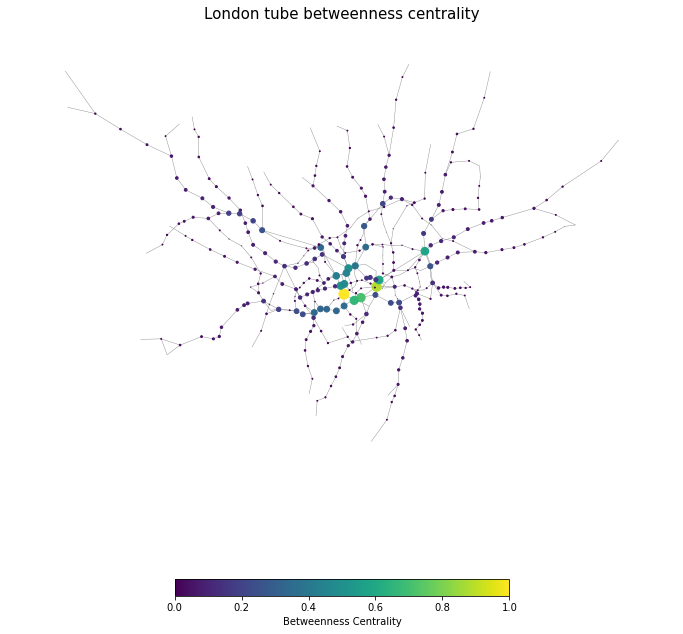

In [42]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

#### Closeness Centrality

In [43]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='v_flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]


,closeness_w
Green Park,2377.570005
Westminster,2372.508792
Waterloo,2367.921764
Bank and Monument,2364.651767
Oxford Circus,2355.726477
Bond Street,2352.788937
Victoria,2345.966755
Liverpool Street,2345.336767
Warren Street,2330.008411
Moorgate,2325.152864


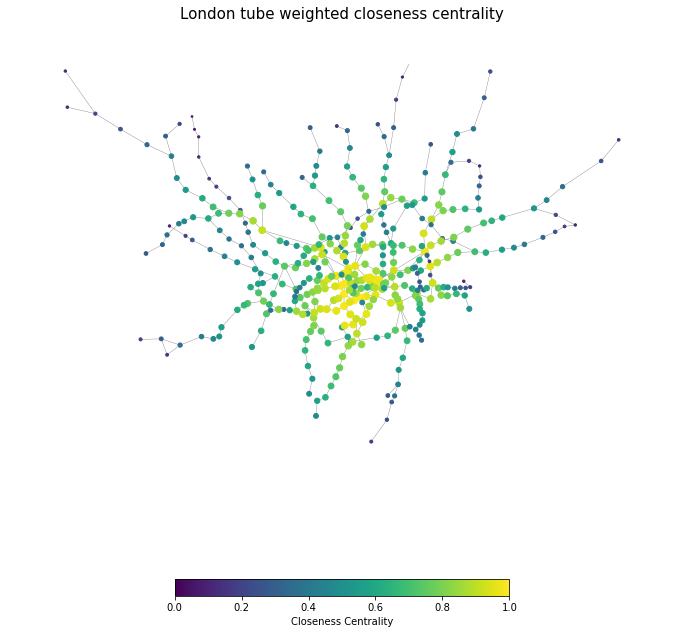

In [44]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

#### Node strength

In [45]:
# To consider the weight of a link into the degree, we need to calculate the node strength:
deg=nx.degree(G, weight="flows")
deg

deg = nx.degree(G2c)
print(f'node strength for clo: {clus_c}')

node strength for clo: 0.03003341687552214


#### Node Removal - Topological Network

In [46]:
G4=G.copy()

In [47]:
# Select top values

values_sorted_b = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_b_4=[e for e,v in values_sorted_b[:1]]
print(sorted_b_4)

['Stratford']


In [48]:
#Remove nodes:

G4.remove_nodes_from(sorted_b_4)
lb4=list(G4.nodes)
print(len(lb4))


400


In [49]:
# number of connected components

print(nx.number_connected_components(G4))


3


In [50]:
# Calculating the average clustering coefficient

clus_b = nx.average_clustering(G4)
print(f'avg clustering coefficient for bet: {clus_b}')


avg clustering coefficient for bet: 0.030625000000000003


In [51]:
# computing the degree for graph
degree_G4=nx.degree(G4)
nx.set_node_attributes(G4,dict(degree_G4),'deg')
G4_deg=[(i[1]['deg']) for i in G4.nodes(data=True)]

In [52]:
#Average degree <k>:
from statistics import mean

av_deg= mean(G4_deg) 
print(f'average degree for bet: {av_deg}')

average degree for bet: 2.29


#### Node Removal - Weighted Network

In [53]:
# Select top values

values_sorted_b = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
sorted_b_4=[e for e,v in values_sorted_b[:1]]
print(sorted_b_4)

['Green Park']


In [54]:
#Remove nodes:

G4.remove_nodes_from(sorted_b_4)
lb4=list(G4.nodes)
print(len(lb4))


399


In [55]:
# number of connected components

print(nx.number_connected_components(G4))


3


In [56]:
# Calculating the average clustering coefficient

clus_b = nx.average_clustering(G4, weight='flows')
print(f'avg clustering coefficient for bet: {clus_b}')


avg clustering coefficient for bet: 0.0013540125349336565


In [57]:
# computing the degree for graph
degree_G4=nx.degree(G4, weight='flows')
nx.set_node_attributes(G4,dict(degree_G4),'deg')
G4_deg=[(i[1]['deg']) for i in G4.nodes(data=True)]

In [58]:
#Average degree <k>:
from statistics import mean

av_deg= mean(G4_deg) 
print(f'average degree for bet: {av_deg}')

average degree for bet: 44800.22055137844


# **Part 2: Spatial Interaction models**

## III Models and calibration

In [59]:
# Import the libraries
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [60]:
# Import Dataset
cdata = pd.read_csv('london_flows.csv')

In [61]:
cdata.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [62]:
# excludes intra flow 
cdata= (cdata[cdata['station_origin'] != cdata['station_destination']].reset_index())
cdata

,index,station_origin,station_destination,flows,population,jobs,distance
0,0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,1,Abbey Road,Beckton,1,599,442,8510.121774
2,2,Abbey Road,Blackwall,3,599,665,3775.448872
3,3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...,...
61451,61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61452,61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61453,61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61454,61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


### Unconstrained Model

In [63]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well

cdatamat = pd.pivot_table(cdata, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [64]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(cdata["flows"])

\begin{equation}
T_{ij} = k O_i^\alpha  D_j^\gamma  d_{ij}^{-\beta}
\end{equation}

Now we can create some flow estimates using equation above... Begin by applying the parameters to the variables:

In [65]:
Oi1_alpha = cdata["population"]**alpha
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = cdata["distance"]**-beta

T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)
k

13.454256498217822

In [66]:
#run the model and store of the new flow estimates in a new column
cdata["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
cdata["unconstrainedEst1"] = cdata["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst1"])

1538987

In [67]:
cdatamat1 = cdata.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,562
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,54
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,2.0,0.0,NaN,2.0,...,1.0,0.0,0.0,2.0,NaN,0.0,NaN,0.0,NaN,611
Aldgate,NaN,NaN,0.0,NaN,149.0,NaN,NaN,0.0,NaN,25.0,...,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,9961
Aldgate East,NaN,NaN,0.0,161.0,NaN,NaN,0.0,0.0,NaN,24.0,...,1.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,8079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,332
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,213


In [68]:
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [69]:
#create the formula
formula = 'flows ~ population + jobs + distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdata, 
                  family=sm.families.Poisson()).fit()

#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4951e+06
Date:                Tue, 10 May 2022   Deviance:                   2.8180e+06
Time:                        08:03:57   Pearson chi2:                 5.36e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6637      0.002   2026.267      0.0

### Testing the "Goodness-of-fit"

#### R-Squared

In [70]:
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdata["flows"], cdata["unconstrainedEst1"])

0.034643713549418496

#### Root Mean Squared Error (RMSE)

In [71]:
def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(cdata["flows"], cdata["unconstrainedEst1"])

485.365

### Improving our model: 1 -  calibrating parameters

#### Poisson Regression

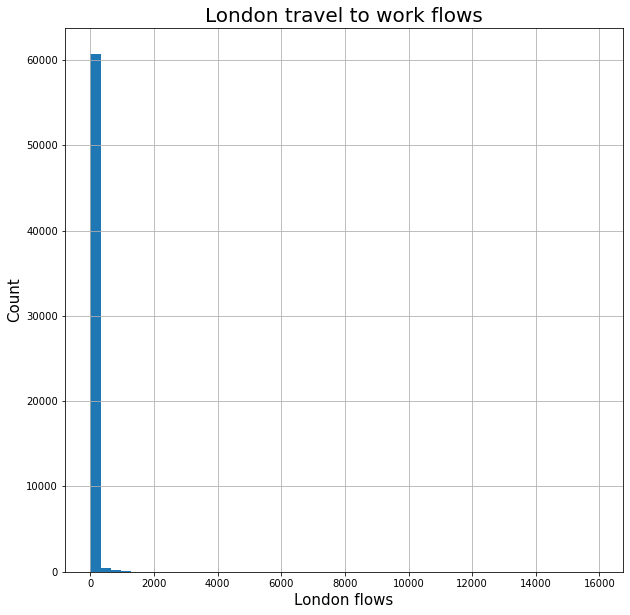

In [72]:
plt.subplots(figsize=(10,10))

plt.hist(cdata["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("London flows", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(flows)')

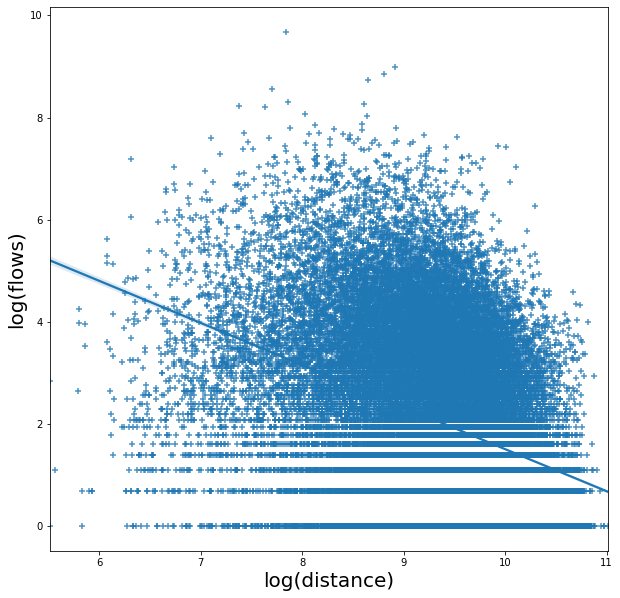

In [73]:
#subset the dataframe to the flows we want
cdata_flows = cdata[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdata_flows["distance"])
y = np.log(cdata_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)

In [74]:
# before take the logarithms of the variables, 
# check whether there are nan values 
d = np.log(cdata['population']) # population, jobs, distance are checked respectively
d = np.where(np.isnan(d))
print (d)

(array([], dtype=int64),)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [75]:
# before take the logarithms of the variables, 
# check whether there are infinity values 
d = np.log(cdata['population']) # population, jobs, distance are checked respectively
d = np.where(np.isinf(d))
print (d)

(array([3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805,
       3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816,
       3817]),)


In [76]:
# Calculate logarithms then drop the inf values
cdata['log_population'] = np.log(cdata['population'])
cdata['log_jobs'] = np.log(cdata['jobs'])
cdata['log_distance'] = np.log(cdata['distance'])

# Replace infinite updated data with nan
cdata.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
cdata.dropna(inplace=True)
cdata



,index,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance
0,0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,10,6.395262,11.271478,9.003504
1,1,Abbey Road,Beckton,1,599,442,8510.121774,0,6.395262,6.091310,9.049012
2,2,Abbey Road,Blackwall,3,599,665,3775.448872,0,6.395262,6.499787,8.236275
3,3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,18,6.395262,10.981421,8.534348
4,4,Abbey Road,Canning Town,37,599,15428,2228.923167,25,6.395262,9.643939,7.709274
...,...,...,...,...,...,...,...,...,...,...,...
61451,61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,2,8.973605,8.114325,9.503144
61452,61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8,8.973605,8.610137,9.071245
61453,61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,0,8.973605,5.991465,9.162905
61454,61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,3,8.973605,6.794587,8.585832


In [77]:
#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdata, 
                  family=sm.families.Poisson()).fit()

In [78]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Tue, 10 May 2022   Deviance:                   2.3848e+06
Time:                        08:04:00   Pearson chi2:                 4.76e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

The calibrated beta is 0.6228

In [79]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta*cdata["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdata["fitted"] = predictions_summary_frame["mean"]

In [80]:
#round the numbers so that we don't get a half of a person
cdata["unconstrainedEst2"] = round(cdata["unconstrainedEst2"], 0)
#convert to integers
cdata["unconstrainedEst2"] = cdata["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst2"])

1542355

In [81]:
#turn it into a little matrix and have a look at your handy work
cdatamat2 = cdata.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [82]:
#compare it to the actual flows
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [83]:
CalcRSqaured(cdata["flows"], cdata["unconstrainedEst2"])

0.3211903577361868

In [84]:
CalcRMSE(cdata["flows"], cdata["unconstrainedEst2"])

108.334

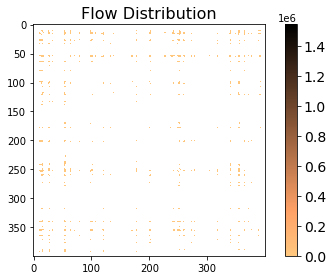

In [112]:
# Plot the Flow Distribution
df = cdatamat
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.autolayout"] = True
# f = plt.figure(figsize=(19, 15))
im = plt.imshow(df, cmap="copper_r")
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=14)
plt.title('Flow Distribution', fontsize=16)
plt.show()
# plt.savefig('flow distribution.png', dpi=300, bbox_inches = 'tight')

## IV Scenarios

### 4.1 Scenario A

In [87]:
# Create a new variable for the varied jobs
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = row["jobs"] * 0.5
    else:
        val = row["jobs"]
    return val
        
cdata["dec_jobs"] = cdata.apply(new_jobs, axis =1)
cdata = cdata.reset_index()

In [88]:
# Add the new value into the model
cdata["unconstrainedEst3"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*np.log(cdata["log_jobs"]) 
                                       - beta*cdata["log_distance"])

#round the numbers so that we don't get a half of a person
cdata["unconstrainedEst3"] = round(cdata["unconstrainedEst3"], 0)
#convert to integers
cdata["unconstrainedEst3"] = cdata["unconstrainedEst3"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst3"])

4006

In [89]:
#turn it into a little matrix and have a look at your handy work
cdatamat3 = cdata.pivot_table(values ="unconstrainedEst3", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,4
Aldgate East,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0


To make the number of commuters conserved, the step below need to be added. P.S. the calibrated beta uses previous unconstrained model's

In [90]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = cdata["jobs"]**gamma
dist_beta = -uncosim.params[3]
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [91]:
#create Oi column in the dataframe and store row and column totals in them:
#to create O_i, take cdata ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdata.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdata = cdata.merge(O_i, on = "station_origin", how = "left" )


In [92]:
#to check everything works, recreate the original estimates
cdata["unconstrainedEst4"] = cdata["A_i"]*cdata["O_i"]*Dj2_gamma*dist_beta
#round
cdata["unconstrainedEst4"] = round(cdata["unconstrainedEst4"])
#check
cdata[["unconstrainedEst3", "unconstrainedEst4"]]

,unconstrainedEst3,unconstrainedEst4
0,0,138.0
1,0,3.0
2,0,4.0
3,0,111.0
4,0,40.0
...,...,...
61408,0,158.0
61409,0,231.0
61410,0,32.0
61411,0,58.0


In [93]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = cdata["dec_jobs"]**gamma
#calcualte the first stage of the Ai values
cdata["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(cdata.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
cdata = cdata.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [94]:
#to check everything works, recreate the original estimates
cdata["unconstrainedEst5"] = cdata["A_i2"]*cdata["O_i"]*Dj3_gamma*dist_beta
#round
cdata["unconstrainedEst5"] = round(cdata["unconstrainedEst5"])

In [95]:
cdatamat4 = cdata.pivot_table(values ="unconstrainedEst5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatamat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1225.0
Acton Town,NaN,NaN,NaN,24.0,24.0,NaN,4.0,2.0,NaN,25.0,...,21.0,3.0,9.0,7.0,NaN,4.0,NaN,4.0,NaN,3743.0
Aldgate,NaN,NaN,7.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,16.0,NaN,7.0,5.0,NaN,3.0,NaN,3.0,NaN,2884.0
Aldgate East,NaN,NaN,8.0,20.0,NaN,NaN,3.0,1.0,NaN,20.0,...,17.0,3.0,7.0,6.0,NaN,3.0,NaN,3.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,12.0,32.0,32.0,NaN,NaN,NaN,NaN,33.0,...,27.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,8.0,21.0,21.0,NaN,4.0,NaN,NaN,22.0,...,18.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [119]:
CalcRSqaured(cdata["flows"], cdata["unconstrainedEst5"])

0.36645022966851903

In [120]:
CalcRMSE(cdata["flows"], cdata["unconstrainedEst5"])

105.615

### 4.2 Scenario B

#### Doubly Constrained Model

In [96]:
#create the formula (the "-1" indicates no intercept in the regression model).
dbl_form = 'flows ~ station_destination + station_origin + log_distance-1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=cdata, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
# print(doubSim.summary())

In [97]:
#get the estimates
cdata["doubsimfitted"] = np.round(doubSim.mu)
#here's the matrix
cdatasubmat5 = cdata.pivot_table(values ="doubsimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,15.0,15.0,NaN,11.0,1.0,NaN,17.0,...,30.0,3.0,5.0,12.0,NaN,2.0,NaN,2.0,NaN,3747.0
Aldgate,NaN,NaN,2.0,NaN,42.0,NaN,NaN,0.0,NaN,19.0,...,7.0,NaN,2.0,2.0,NaN,1.0,NaN,1.0,NaN,2873.0
Aldgate East,NaN,NaN,2.0,49.0,NaN,NaN,1.0,0.0,NaN,21.0,...,8.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,31.0,33.0,NaN,NaN,NaN,NaN,29.0,...,29.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,18.0,17.0,NaN,3.0,NaN,NaN,22.0,...,21.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [98]:
# To compare
cdatamat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [99]:
CalcRSqaured(cdata["flows"],cdata["doubsimfitted"])

0.4076853229296063

In [100]:
CalcRMSE(cdata["flows"],cdata["doubsimfitted"])

101.335

#### Tweaking model

#### Entropy

In [126]:
#create Dj columns in the dataframe and store row and column totals in them:
#to create Dj, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
D_j = pd.DataFrame(cdata.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdata = cdata.merge(D_j, on = "station_destination", how = "left" )

In [124]:

# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [134]:

# Use the beta we got from the inverse power model
beta = -doubSim.params[1]
# Get the balancing factors.
cdata = balance_doubly_constrained(cdata,'station_origin','station_destination','O_i','D_j','distance',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
cdata['SIM_est_pow'] = np.round(cdata['O_i'] * cdata['Ai_new'] * cdata['D_j'] * cdata['Bj_new'] * 
                                   np.exp(np.log(cdata['distance'])*-beta))
# Check out the matrix
pd.pivot_table(cdata,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33,598.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1218.0
Acton Town,0,0,0,32,31,0,0,0,0,29,...,10,1,6,2,0,2,0,2,0,3734.0
Aldgate,0,0,8,0,5,0,0,1,0,13,...,23,0,6,6,0,2,0,3,0,2886.0
Aldgate East,0,0,9,6,0,0,3,1,0,15,...,24,3,7,7,0,2,0,3,0,3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,8,29,26,0,0,0,0,33,...,20,0,6,0,0,0,0,0,0,4866.0
Woodgrange Park,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,531.0
Woodside Park,0,0,5,23,23,0,2,0,0,19,...,12,0,4,0,0,0,0,0,0,3093.0


In [132]:
CalcRSqaured(cdata["flows"],cdata["SIM_est_pow"])

0.047187930759182865

In [133]:
CalcRMSE(cdata["flows"],cdata["SIM_est_pow"])

160.526